<center><h1>Novartis Data Science Challenge</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/My Drive/Novartis/Train.csv')

print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (23856, 18)


In [5]:
print('Head of the dataframe\n')

df.head()

Head of the dataframe



,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


<center><h1>Exploratory Data Analysis</h>

### Check for null values and dtype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

### Observation:
- All columns are with right dypes
- No columns have null values except X_12 column.
- We will impute with a more meaningful value after a few analysis.

In [7]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


- Under X_12 column, 25th, 50th and 75th percentile is 1.
- We will fill the null values under X_12 with 1

In [8]:
import copy
dfc = copy.deepcopy(df)

In [9]:
dfc.fillna(float(1.0), inplace = True)

## Column DATE

- Value counts for DATE column

In [10]:
dfc.DATE.value_counts()

12-SEP-01    22
13-SEP-01    20
17-SEP-01    17
11-SEP-01    15
15-SEP-01    15
             ..
03-DEC-07     1
08-JUN-14     1
24-FEB-14     1
15-NOV-00     1
29-JUL-04     1
Name: DATE, Length: 9121, dtype: int64

- There are 9121 unique types.
- We will extract date, month and year from the DATE column and storing in new dataframes.
- We will add str(20) to the year if it is less than str(21) and greater than str(99). Also, we will add str(19) if the year is less than str(00). 

In [11]:
# extracting date
dfc['date'] = dfc.DATE.apply(lambda x: x.split('-')[0])

# extracting month
dfc['month'] = dfc.DATE.apply(lambda x: x.split('-')[1])

In [12]:
# extracting year
short_year = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', \
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

dfc['year'] = dfc.DATE.apply(lambda x: str(20) + x.split('-')[2] if x.split('-')[2]  in short_year else str(19) + x.split('-')[2])

In [13]:
dfc.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,date,month,year
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,JUL,2004
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,JUL,2017
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,MAR,2017
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,FEB,2009
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,APR,2005


### Visualize monthly MULTIPLE OFFENSE

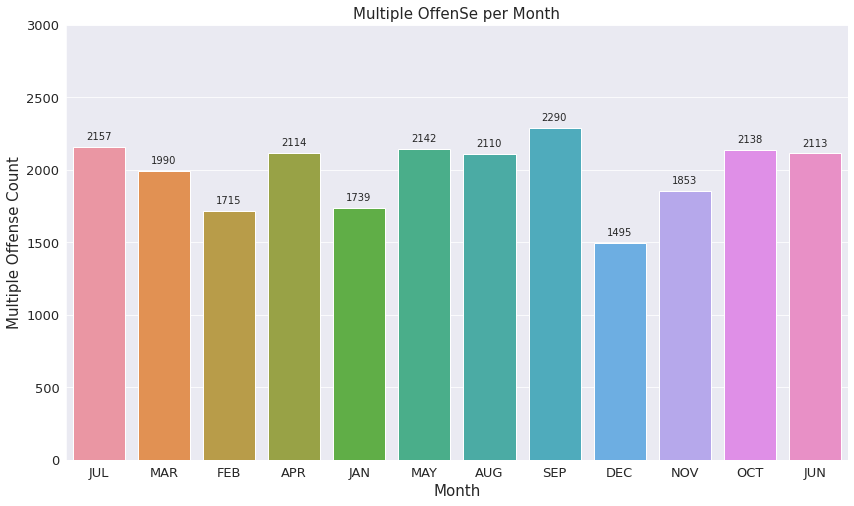

In [14]:
plt.figure(figsize = (14,8))

sns.set_style('darkgrid')
ax = sns.countplot(dfc.month)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Multiple Offense Count', fontsize = 15)
ax.set_title('Multiple OffenSe per Month', fontsize = 15)

plt.xticks(fontsize = 13)
plt.yticks(np.arange(0, 3001, 500), fontsize = 13)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height() + 50, \
            str(i.get_height()))
plt.show()


### Observation:
- Least offence happend in the month of December while more in the month of September.

### Visualize yearly MULTIPLE OFFENSE

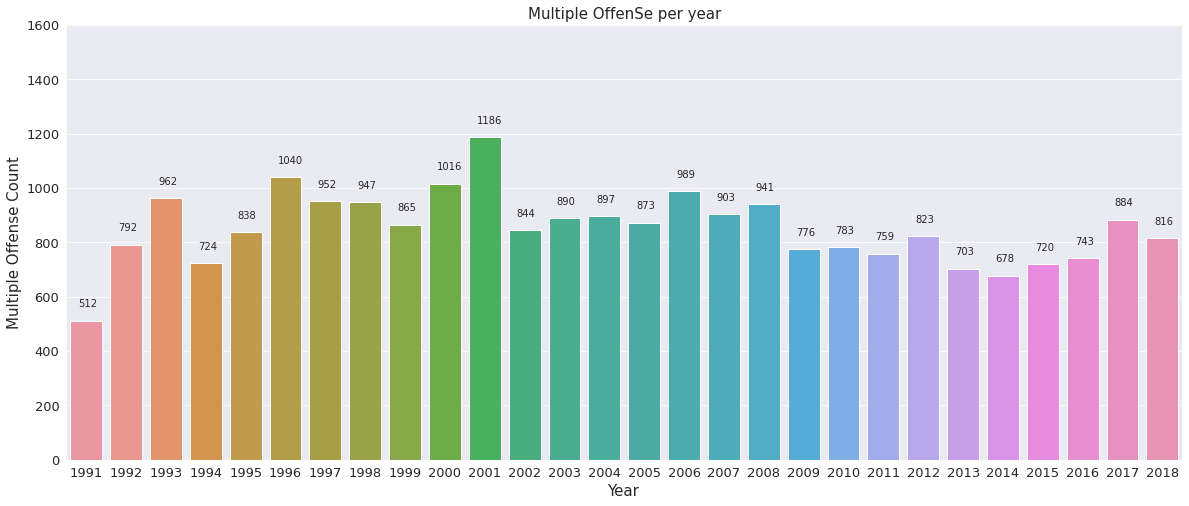

In [15]:
plt.figure(figsize = (20,8))

sns.set_style('darkgrid')
ax = sns.countplot(dfc.year)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Multiple Offense Count', fontsize = 15)
ax.set_title('Multiple OffenSe per year', fontsize = 15)

plt.xticks(fontsize = 13)
plt.yticks(np.arange(0, 1601, 200), fontsize = 13)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height() + 50, \
            str(i.get_height()))
plt.show()


### Observation:
- Least offence is in the year 1991 and more in the year 2001.

### Label Encoding date, month and year columns

In [16]:
from sklearn.preprocessing import LabelEncoder

# label encoding date
le_date = LabelEncoder()
le_date.fit(dfc.date)
dfc.date = le_date.transform(dfc.date)

# label encoding month
le_month = LabelEncoder()
le_month.fit(dfc.month)
dfc.month = le_month.transform(dfc.month)

# label encoding year
le_year = LabelEncoder()
le_year.fit(dfc.year)
dfc.year = le_year.transform(dfc.year)

## Correlation for feature selection

### Pandas Profiling for EDA

In [ ]:
# import pandas_profiling as pp

# pp.ProfileReport(dfc.drop(['INCIDENT_ID', 'DATE'], axis = 1))

### Checking correlation with heatmap

Correlation with heatmap



<function matplotlib.pyplot.show>

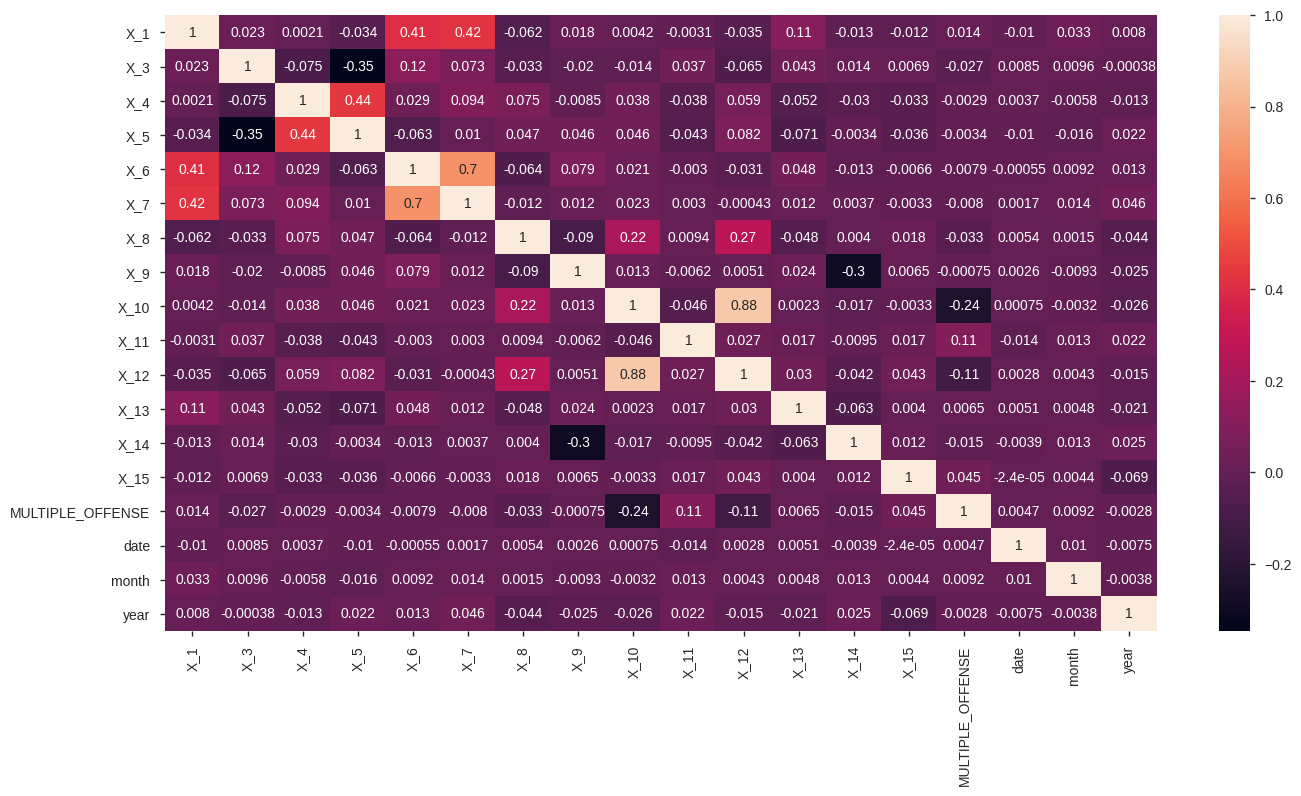

In [ ]:
print('Correlation with heatmap\n')

plt.figure(figsize = (16,8))
sns.heatmap(dfc.corr(), annot = True)
plt.show

### Multi-collinearity problem
- When one feature can be represented interms of other, it can impact the performace leading the multi-collinearity problem.
- If the features are perfectly positive (1) or negative (-1), we can remove one of the features.
- Though decision tree and boosted algorithms are immune to multi-collinearity, we will still remove one of the perfectly correlated features.
- We can remove one of the features that have correlation value more than 0.9 or 0.95 or any set threshold value as per the domain knowledge.
- In the above case, we can see X_2 and X_3 have a perfect positive correlation of the value 1. We will remove either X_2 or X_3.


In [ ]:
# dropping X_2 as it is perfectly positive correlated with X_3 with the correlation value of 1.
dfc.drop('X_2', axis  = 1, inplace = True)

### Column MULTIPLE_OFFENSE

### Visualize MULTIPLE OFFENCE count

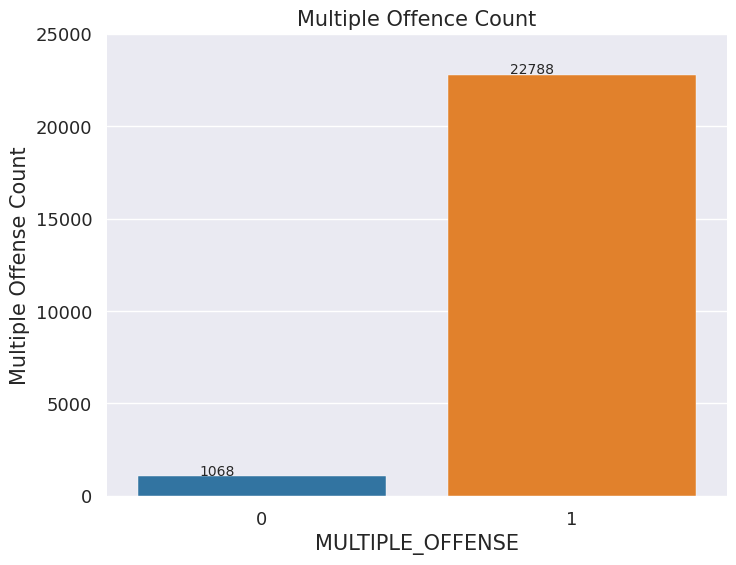

In [ ]:
plt.figure(figsize = (8,6))

sns.set_style('darkgrid')
ax = sns.countplot(dfc.MULTIPLE_OFFENSE)
ax.set_xlabel('MULTIPLE_OFFENSE', fontsize = 15)
ax.set_ylabel('Multiple Offense Count', fontsize = 15)
ax.set_title('Multiple Offence Count', fontsize = 15)

plt.xticks(fontsize = 13)
plt.yticks(np.arange(0, 26001, 5000), fontsize = 13)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height() + 50, \
            str(i.get_height()))
plt.show()


### Observation:
- Data set is hugely imbalance.
- Label 0 is just 5% and the label 1 is 95%
- We will handle this imabalance data set with upsampling the minority classes.

### Upsampling minority classes (0)

In [ ]:
# Separate majority and minority classes
df_majority = dfc[dfc.MULTIPLE_OFFENSE == 1]
df_minority = dfc[dfc.MULTIPLE_OFFENSE == 0]

print('Shape of majority', df_majority.shape)
print('Shape of minority', df_minority.shape)

Shape of majority (22788, 20)
Shape of minority (1068, 20)


In [ ]:
from sklearn.utils import resample

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace = True,     # sample with replacement
                                 n_samples = df_majority.shape[0],    # to match majority class
                                 random_state = 123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.MULTIPLE_OFFENSE.value_counts()

1    22788
0    22788
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
dfc = copy.deepcopy(df_upsampled)

### Visualize label count after upsampling

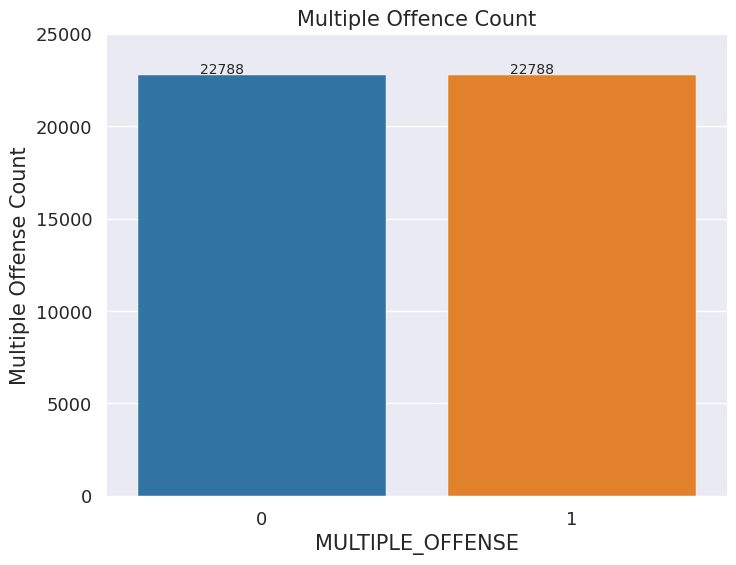

In [ ]:
plt.figure(figsize = (8,6))

sns.set_style('darkgrid')
ax = sns.countplot(dfc.MULTIPLE_OFFENSE)
ax.set_xlabel('MULTIPLE_OFFENSE', fontsize = 15)
ax.set_ylabel('Multiple Offense Count', fontsize = 15)
ax.set_title('Multiple Offence Count', fontsize = 15)

plt.xticks(fontsize = 13)
plt.yticks(np.arange(0, 26001, 5000), fontsize = 13)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height() + 50, \
            str(i.get_height()))
plt.show()


### Observation:
- Now the data set is balanced after upsampling the minority class.

<center><h>

<center><h1>XGBoost Algorithm Model</h1>

In [ ]:
x = dfc.drop(['INCIDENT_ID', 'DATE', 'MULTIPLE_OFFENSE'], axis = 1)
y = dfc.MULTIPLE_OFFENSE.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True, random_state = 0)

In [ ]:
print('Shape of x_train:', x_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (41018, 17)
Shape of x_test: (4558, 17)
Shape of y_train: (41018,)
Shape of y_test: (4558,)


### Hyperparameter tuning

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {'n_estimators': [5, 10, 30, 50, 70, 90, 120, 150, 170, 190, 210],
          'max_depth': [2, 3, 5, 8, 10, 12, 14]}

xg = XGBClassifier()

clf_xg = GridSearchCV(xg, params, cv = 4, return_train_score = True, scoring = 'recall')

clf_xg.fit(x_train, y_train)

CPU times: user 18min 14s, sys: 2.97 s, total: 18min 17s
Wall time: 18min 18s


In [ ]:
print('Best estimator:', clf_xg.best_estimator_)
print('Best score:', clf_xg.best_score_)

Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=210, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Best score: 0.9991707031473125


In [ ]:
import pickle
# pickle.dump(clf_xg, open('/content/drive/My Drive/Novartis/clf_xgboost.pkl', 'wb'))

### Predicting x_test and check if it is overfitting or not

In [ ]:
# predicting x_test
pred_xtest_xg = clf_xg.predict(x_test)

# predicting x_train
pred_xtrain_xg = clf_xg.predict(x_train)


In [ ]:
from sklearn.metrics import recall_score
pred_xtrain_score = recall_score(y_train, pred_xtrain_xg)
pred_xtest_score = recall_score(y_test, pred_xtest_xg)

print('x_train recall score:', pred_xtrain_score)
print('x_test recall score:', pred_xtest_score)

x_train recall score: 0.9999024295053176
x_test recall score: 1.0


### Visualizing score to check overfitting

In [ ]:
# get the results
result_xg = clf_xg.cv_results_

# get the train and cv accuracy
train_recall = result_xg['mean_train_score']
cv_recall = result_xg['mean_test_score']

# get the parameters
param_max_depth = result_xg['param_max_depth']
param_n_estimators = result_xg['param_n_estimators']

In [ ]:
# create a dataframe that will have parameters and corresponding recall
dic_scr_map = {'Estimators': param_n_estimators, 'Maximum Depth': param_max_depth, \
                 'Train Recall': train_recall, 'CV Recall': cv_recall}

df_scr_map = pd.DataFrame(data = dic_scr_map, columns = ['Estimators', 'Maximum Depth', 'Train Recall', 'CV Recall'])
 

### Heatmap for Train Recall

Text(0.5, 1.0, '\nHeatmap for Train Recall, Estimator, and Maximum Depth\n')

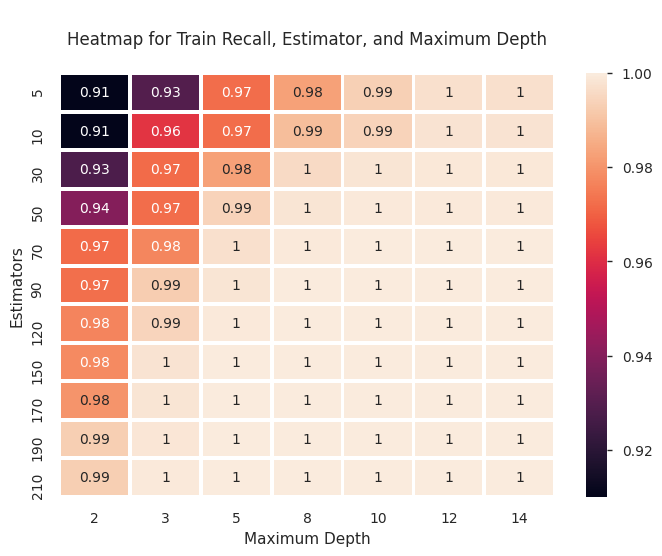

In [ ]:
# seaborn heatmap to visualize train and cv recall with respect to parameters
# this is to check if the model is overfitting or not

df_train_pivot = df_scr_map.pivot('Estimators', 'Maximum Depth', 'Train Recall')
sns.heatmap(df_train_pivot, annot = True, linewidths = 2)
plt.title("\nHeatmap for Train Recall, Estimator, and Maximum Depth\n")

### Heatmap for Train Recall

Text(0.5, 1.0, '\nHeatmap for Cv Recall, Estimator, and Maximum Depth\n')

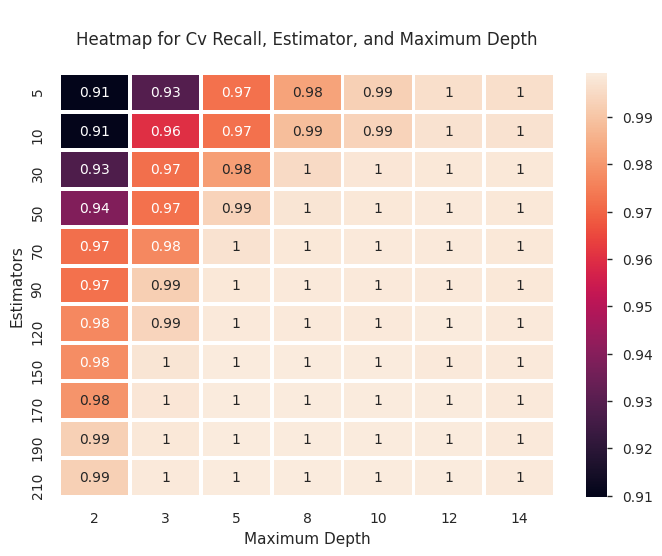

In [ ]:
# seaborn heatmap to visualize train and cv recall with respect to parameters
# this is to check if the model is overfitting or not

df_cv_pivot = df_scr_map.pivot('Estimators', 'Maximum Depth', 'CV Recall')
sns.heatmap(df_cv_pivot, annot = True, linewidths = 2)
plt.title("\nHeatmap for Cv Recall, Estimator, and Maximum Depth\n")

### Observation:
- From the heatmap for train recall and cv recall, as the depth increased, recall increased.
- Also, as the estimators increased, recall also increased for both train and cv.
- There is not overfitting.

### Training on complete train data with best hyperparameters obtained from tuning
- Best max_depth is 5
- Best n_estimators is 210

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, n_estimators = 210)

xgb.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=210, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<center><h1>Test Data Prediction Submission </h1>

In [17]:
sam = pd.read_csv('/content/drive/My Drive/Novartis/sample_submission.csv')

print('Shape of the dataframe:', sam.shape)

print('\nHead of the sample_submission\n')

sam.head()

Shape of the dataframe: (7, 2)

Head of the sample_submission



,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


### Importing test data

In [18]:
test = pd.read_csv('/content/drive/My Drive/Novartis/Test.csv')

print('Shape of the dataframe:', test.shape)

Shape of the dataframe: (15903, 17)


In [19]:
print('\nHead of the test\n')

test.head()


Head of the test



,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [20]:
# deep copy of test data to avoid override
testc = copy.deepcopy(test)

### Check for null values

In [21]:
testc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


- X_12 have few null values.
- Filling it with 1

In [22]:
testc.fillna(1, inplace = True)

### Column DATE
- Let us check the value counts of DATE column

In [23]:
testc.DATE.value_counts()

13-SEP-01    16
15-SEP-01    12
14-SEP-01    12
12-SEP-01    12
01-MAR-08     9
             ..
30-JUL-03     1
04-MAY-09     1
10-JAN-10     1
13-MAR-00     1
14-NOV-94     1
Name: DATE, Length: 7939, dtype: int64

- There are 9121 unique types.
- We will extract date, month and year from the DATE column and storing in new dataframes.
- We will add str(20) to the year if it is less than str(21) and greater than str(99). Also, we will add str(19) if the year is less than str(00).

In [24]:
# extracting date
testc['date'] = testc.DATE.apply(lambda x: x.split('-')[0])

# extracting month
testc['month'] = testc.DATE.apply(lambda x: x.split('-')[1])

In [25]:
# extracting year
short_year = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', \
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

testc['year'] = testc.DATE.apply(lambda x: str(20) + x.split('-')[2] if x.split('-')[2]  in short_year else str(19) + x.split('-')[2])

### Dropping X_2 feature

In [26]:
testc.drop('X_2', axis = 1, inplace = True)

In [27]:
testc.head()

,INCIDENT_ID,DATE,X_1,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,date,month,year
0,CR_195453,01-FEB-18,0,35,7,3,6,4,0,5,1,174,1.0,72,119,23,01,FEB,2018
1,CR_103520,05-MAR-04,0,44,1,3,7,1,4,6,1,316,0.0,12,29,34,05,MAR,2004
2,CR_196089,27-JAN-18,0,33,3,5,2,7,3,0,1,316,1.0,72,0,34,27,JAN,2018
3,CR_112195,18-AUG-06,7,2,3,5,9,8,0,5,1,174,1.0,112,87,34,18,AUG,2006
4,CR_149832,31-OCT-11,0,8,7,3,2,7,1,5,1,174,0.0,112,93,43,31,OCT,2011


### Label Encoding date, month and year columns

- Test data should not be fit and transformed. It should be only transformed to avoid data leakage. 
- When I was just transforming, I was getting error for a new data value in the test data which was not in the train data.
- If you people have a better method to avoid the above error, please ping me in linkedin or comment under the post - https://www.linkedin.com/in/sandeep-panchal-682734111/

In [31]:
le_date.classes_

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [32]:
# appending '<unknown>' to labelencoder classes to handling unseen labels

# date
testc.date = testc.date.map(lambda c: '<unknown>' if c not in le_date.classes_ else c)
le_date.classes_ = np.append(le_date.classes_, '<unknown>')

# month
testc.month = testc.month.map(lambda c: '<unknown>' if c not in le_month.classes_ else c)
le_month.classes_ = np.append(le_month.classes_, '<unknown>')

# year
testc.year = testc.year.map(lambda c: '<unknown>' if c not in le_year.classes_ else c)
le_year.classes_ = np.append(le_year.classes_, '<unknown>')

- Below is the right approach to transform the test data not to fit.

In [34]:
from sklearn.preprocessing import LabelEncoder

# label encoding date
testc.date = le_date.transform(testc.date)

# label encoding month
testc.month = le_month.transform(testc.month)

# label encoding year
testc.year = le_year.transform(testc.year)

In [35]:
testc.head()

,INCIDENT_ID,DATE,X_1,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,date,month,year
0,CR_195453,01-FEB-18,0,35,7,3,6,4,0,5,1,174,1.0,72,119,23,0,3,27
1,CR_103520,05-MAR-04,0,44,1,3,7,1,4,6,1,316,0.0,12,29,34,4,7,13
2,CR_196089,27-JAN-18,0,33,3,5,2,7,3,0,1,316,1.0,72,0,34,26,4,27
3,CR_112195,18-AUG-06,7,2,3,5,9,8,0,5,1,174,1.0,112,87,34,17,1,15
4,CR_149832,31-OCT-11,0,8,7,3,2,7,1,5,1,174,0.0,112,93,43,30,10,20


### Prediction of test data

In [ ]:
# dropping INCIDENT_ID and DATE columns

test_x = testc.drop(['INCIDENT_ID', 'DATE'], axis = 1)

In [ ]:
# predicting test data

test_x_pred = xgb.predict(test_x)

### Creating a submission dataframe with columns test INCIDENT_ID and MULTIPLE_OFFENSE

In [ ]:
submission = pd.DataFrame()

submission['INCIDENT_ID'] = test['INCIDENT_ID']
submission['MULTIPLE_OFFENSE'] = test_x_pred

In [ ]:
# saving the submssion file

submission.to_csv('prediction_xgboost_5.csv', index = False)

<center><h1>END</h1>